Mounted at /content/drive
(10000, 17613)
   usual                                            review_  polarity  \
0    0.0  I usually love going to this t-mobile. The rep...  0.207273   
1    0.0  The store gave me misleading information.  One...  0.019444   
2    0.0  Nice, stand-alone T-Mobile in the parking lot ...  0.433333   
3    0.0  I get awesome service every time I come here. ...  0.221875   
4    0.0  Very busy I waited for 45 min before even bein...  0.300000   

          sentiment_  love   go  tmobil  repres  alway  nice  ...  200mbps  \
0  Slightly Positive   0.0  0.0     0.0     0.0    0.0   0.0  ...      0.0   
1  Slightly Negative   0.0  0.0     0.0     0.0    0.0   0.0  ...      0.0   
2           Positive   0.0  0.0     0.0     0.0    0.0   0.0  ...      0.0   
3  Slightly Positive   0.0  0.0     0.0     0.0    0.0   0.0  ...      0.0   
4  Slightly Positive   0.0  0.0     0.0     0.0    0.0   0.0  ...      0.0   

   50mbps  starlink  sparklightcar  10100  17044  d

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy Score:  0.6866666666666666



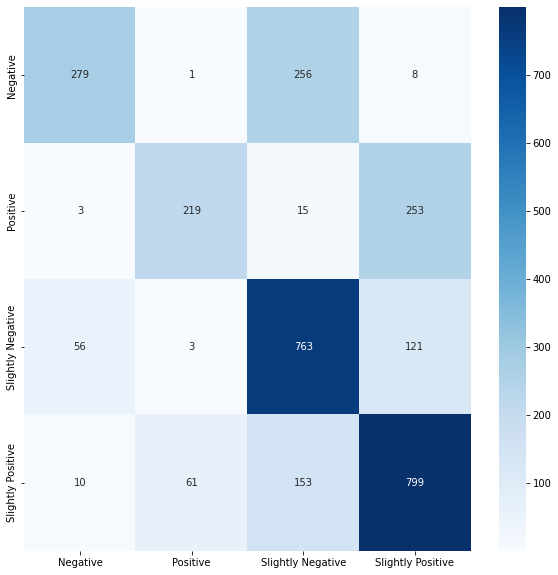

In [ ]:
  import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import     
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
# from pycm import *
from google.colab import drive
drive.mount("/content/drive",force_remount=True)
INPUT_FILEBASE = "/content/drive/MyDrive/yelp_dataset_in/"
OUTPUT_FILEBASE = "/content/drive/MyDrive/yelp_dataset_out/"

pickle_name = "yelp_reviews_Electronics_categories_final.pickle"
df1 = pd.read_pickle("%s%s" %(OUTPUT_FILEBASE,pickle_name))
print(df1.shape)
df1 = df1[:10000]
# csv_name = "yelp_reviews_Electronics_categories_final.csv"
# df1 = pd.read_csv("%s%s" %(OUTPUT_FILEBASE,csv_name))
print(df1.head())
print(df1["sentiment_"].unique())
# assert False
# df1.dropna(subset=["sentiment"],inplace=True)
# assert False

X = df1.iloc[0:,4:]
y = df1.sentiment_

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=0,test_size=0.3)

clf2 = LogisticRegression(solver = 'lbfgs',max_iter=1000)
model = Pipeline([('classifier',clf2)])
model.fit(Xtrain, ytrain)
predictions = model.predict(Xtest)
mat = confusion_matrix(ytest,predictions)
cm_df =  pd.DataFrame(mat, index= [i for i in ['Negative','Positive',
                                               'Slightly Negative',
                                              'Slightly Positive']],
                     columns= [i for i in ['Negative','Positive',
                                               'Slightly Negative',
                                              'Slightly Positive']])
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True,cmap='Blues',fmt='g')

cm = confusion_matrix(list(ytest),list(predictions))
print('Accuracy Score: ',accuracy_score(predictions,ytest))
print('')
# cm.stat(summary=True)
